# Demonstration of Data Tools

In [1]:
import sys
import os
print(f"Python version: {sys.version}")
print(f"Working directory: {os.getcwd()}")
print(f"Virtual environment: {'venv' in sys.executable}")
print("-" * 50)

Python version: 3.8.13 (default, Jan 15 2023, 15:46:20) 
[Clang 14.0.0 (clang-1400.0.29.202)]
Working directory: /Users/davidcurry/Documents/projects/data-tools/notebooks
Virtual environment: False
--------------------------------------------------


In [2]:
!pip install matplotlib scikit-learn tabulate seaborn --quiet

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import tabulate
import seaborn

sys.path.append(os.path.abspath('..'))
import src.data_tools as tools

%load_ext autoreload
%autoreload 2

# Params

In [4]:
test_data_script =  "../src/generate_test_data.py"

# Load Test Data

In [5]:
exec(open(test_data_script).read())

Test Data Generated Successfully!
Shape: (500, 20)
Columns: ['age', 'annual_income', 'credit_score', 'transaction_amount', 'product_views', 'gender', 'state', 'customer_id', 'membership_level', 'account_created', 'is_active', 'has_discount', 'customer_name', 'zip_code', 'product_type', 'feature_a', 'feature_b', 'target', 'empty_column', 'constant_column']
Target rate: 20.00%

Column types:
age                            int64
annual_income                float64
credit_score                 float64
transaction_amount           float64
product_views                float64
gender                        object
state                         object
customer_id                   object
membership_level              object
account_created       datetime64[ns]
is_active                       bool
has_discount                    bool
customer_name                 object
zip_code                      object
product_type                  object
feature_a                    float64
feature_b      

In [6]:
df = pd.read_csv('test_data.csv')
print(f"Loaded data with shape: {df.shape}")
print(f"Target rate: {df['target'].mean():.1%}")

Loaded data with shape: (500, 20)
Target rate: 20.0%


# Data Snapshot

In [7]:
tools.quick_look(df)

DATASET OVERVIEW
Shape: 500 rows × 20 columns
Memory usage: 0.07 MB

Data Types:
object     8
float64    7
int64      3
bool       2
dtype: int64

Missing Values:
                  Missing Count  Percentage
empty_column                500       100.0
credit_score                 55        11.0
membership_level             40         8.0

First few rows:


,age,annual_income,credit_score,transaction_amount,product_views,gender,state,customer_id,membership_level,account_created,is_active,has_discount,customer_name,zip_code,product_type,feature_a,feature_b,target,empty_column,constant_column
0,28,83727.997743,49.444448,587.185346,0.00000,M,NY,CUST000383,NaN,2024-05-04,True,True,Charlie Brown,45814,Product@E,74.322722,62.352008,0,NaN,constant_value
1,37,22890.711694,41.253838,197.826427,0.00000,M,IL,CUST000039,Silver,2024-07-24,True,False,Alice Davis,34561,Product C,90.736181,68.525237,0,NaN,constant_value
2,45,37105.061624,41.113036,604.414719,0.00000,Other,NC,CUST000489,Gold,2022-09-05,True,False,Charlie Johnson,82980,Product/D,123.352362,117.991919,0,NaN,constant_value
3,33,55483.632278,46.269633,21.721193,41.48655,F,IL,CUST000042,Gold,2023-12-12,False,True,Diana Smith,65063,Product C,112.858167,95.357249,0,NaN,constant_value
4,57,27243.393419,48.753416,43.158406,0.00000,M,MI,CUST000387,Gold,2021-08-16,True,True,Jane Brown,42844,Product@E,96.576092,46.700752,0,NaN,constant_value



Random sample:


,age,annual_income,credit_score,transaction_amount,product_views,gender,state,customer_id,membership_level,account_created,is_active,has_discount,customer_name,zip_code,product_type,feature_a,feature_b,target,empty_column,constant_column
374,31,16339.107844,44.760248,15.413297,0.000000,F,CA,CUST000337,Gold,2023-05-01,True,False,John Smith,66363,Product C,112.004254,89.268894,1,NaN,constant_value
409,41,147832.528165,70.623146,93.326327,0.000000,F,IL,CUST000207,Bronze,2022-05-18,True,False,Alice Miller,93397,Product-B,104.111355,85.177481,0,NaN,constant_value
376,33,477712.979628,40.306590,168.707372,0.000000,F,NY,CUST000456,Silver,2023-04-25,True,False,Alice Brown,53952,Product C,110.581397,86.651094,1,NaN,constant_value
50,32,31272.759206,56.147280,11.131765,0.000000,Other,GA,CUST000310,Silver,2022-06-05,True,False,Alice Williams,81887,Product/D,77.490399,50.013339,0,NaN,constant_value
71,38,33649.839793,26.282139,18.618622,30.085975,M,NY,CUST000414,NaN,2022-02-28,True,False,Charlie Brown,83167,Product C,64.909748,45.832455,0,NaN,constant_value



Descriptive statistics:


,age,annual_income,credit_score,transaction_amount,product_views,zip_code,feature_a,feature_b,target,empty_column
count,500.00000,5.000000e+02,445.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,0.0
mean,34.93400,6.651684e+04,51.389075,96.476220,19.425605,56822.332000,100.476001,80.196526,0.200000,NaN
std,11.11615,1.032130e+05,14.588875,93.649593,46.330500,26213.014729,20.795016,19.443569,0.400401,NaN
min,18.00000,4.198534e+03,6.179743,0.199412,0.000000,10036.000000,38.960565,8.151076,0.000000,NaN
25%,26.00000,2.327023e+04,41.567480,29.108790,0.000000,34100.500000,86.089079,67.219059,0.000000,NaN
50%,35.00000,3.943106e+04,51.004861,70.998435,0.000000,58482.500000,101.105816,81.243030,0.000000,NaN
75%,42.00000,6.686483e+04,61.400839,132.111399,0.000000,79481.250000,114.719828,92.901056,0.000000,NaN
max,80.00000,1.150653e+06,97.896614,680.575122,392.623771,99900.000000,156.906285,135.993277,1.000000,NaN


# Categorical Target Correlations

In [8]:
tools.group_analyze(df, 'membership_level', 'target')


Analysis of target by membership_level
Overall target rate: 20.00%
+--------------------+---------+-------------+--------+----------------+--------------------+--------+------------+
| membership_level   |   count |   positives | rate   | pct_of_total   | pct_of_positives   |   lift | lift_pct   |
+====================+=========+=============+========+================+====================+========+============+
| Bronze             |     177 |           9 | 5.08%  | 35.40%         | 9.00%              |  0.254 | -74.6%     |
+--------------------+---------+-------------+--------+----------------+--------------------+--------+------------+
| Silver             |     144 |          12 | 8.33%  | 28.80%         | 12.00%             |  0.417 | -58.3%     |
+--------------------+---------+-------------+--------+----------------+--------------------+--------+------------+
| Gold               |      90 |          31 | 34.44% | 18.00%         | 31.00%             |  1.722 | +72.2%     |
+---

,count,positives,rate,pct_of_total,pct_of_positives,lift,lift_pct
membership_level,,,,,,,
Bronze,177,9,0.050847,0.354,0.09,0.254237,-74.576271
Silver,144,12,0.083333,0.288,0.12,0.416667,-58.333333
Gold,90,31,0.344444,0.180,0.31,1.722222,72.222222
Platinum,49,48,0.979592,0.098,0.48,4.897959,389.795918


In [10]:
# Analyze by state with income stats, showing top 10
tools.group_analyze(df, 'state', 'target', numeric_cols=['annual_income', 'age'], top_n=10)


Analysis of target by state
Overall target rate: 20.00%
+---------+---------+-------------+--------+----------------------+---------------------+------------+-----------+----------------+--------------------+--------+------------+
| state   |   count |   positives | rate   |   annual_income_mean |   annual_income_std |   age_mean |   age_std | pct_of_total   | pct_of_positives   |   lift | lift_pct   |
+=========+=========+=============+========+======================+=====================+============+===========+================+====================+========+============+
| MI      |      58 |          11 | 18.97% |            55013.830 |           60986.920 |     36.410 |    11.680 | 11.60%         | 11.00%             |  0.948 | -5.2%      |
+---------+---------+-------------+--------+----------------------+---------------------+------------+-----------+----------------+--------------------+--------+------------+
| OH      |      58 |           8 | 13.79% |            45128.380 | 

,count,positives,rate,annual_income_mean,annual_income_std,age_mean,age_std,pct_of_total,pct_of_positives,lift,lift_pct
state,,,,,,,,,,,
MI,58,11,0.189655,55013.825098,60986.915345,36.413793,11.681496,0.116,0.11,0.948276,-5.172414
OH,58,8,0.137931,45128.376570,38987.778962,35.000000,11.132377,0.116,0.08,0.689655,-31.034483
IL,55,7,0.127273,55662.777947,66659.574490,37.254545,10.680925,0.110,0.07,0.636364,-36.363636
TX,54,7,0.129630,64541.598739,61482.271693,36.037037,12.446054,0.108,0.07,0.648148,-35.185185
FL,53,12,0.226415,95107.079799,140312.217823,34.811321,10.099613,0.106,0.12,1.132075,13.207547
GA,48,10,0.208333,47669.125611,45268.968348,33.208333,11.072216,0.096,0.10,1.041667,4.166667
PA,46,14,0.304348,57936.470131,77297.676870,31.478261,9.974944,0.092,0.14,1.521739,52.173913
CA,45,11,0.244444,66127.522240,77017.874624,35.888889,10.342371,0.090,0.11,1.222222,22.222222
NC,44,9,0.204545,95121.198259,179830.970084,33.704545,12.028222,0.088,0.09,1.022727,2.272727


In [11]:
# Analyze by gender
tools.group_analyze(df, 'gender', 'target', numeric_cols=['annual_income', 'credit_score'])


Analysis of target by gender
Overall target rate: 20.00%
+----------+---------+-------------+--------+----------------------+---------------------+---------------------+--------------------+----------------+--------------------+--------+------------+
| gender   |   count |   positives | rate   |   annual_income_mean |   annual_income_std |   credit_score_mean |   credit_score_std | pct_of_total   | pct_of_positives   |   lift | lift_pct   |
+==========+=========+=============+========+======================+=====================+=====================+====================+================+====================+========+============+
| M        |     231 |          44 | 19.05% |            67685.260 |          117578.790 |              51.940 |             15.540 | 46.20%         | 44.00%             |  0.952 | -4.8%      |
+----------+---------+-------------+--------+----------------------+---------------------+---------------------+--------------------+----------------+----------------

,count,positives,rate,annual_income_mean,annual_income_std,credit_score_mean,credit_score_std,pct_of_total,pct_of_positives,lift,lift_pct
gender,,,,,,,,,,,
M,231,44,0.190476,67685.257830,117578.785705,51.942371,15.540530,0.462,0.44,0.952381,-4.761905
F,217,43,0.198157,65379.567020,77611.461375,51.396902,12.843002,0.434,0.43,0.990783,-0.921659
Other,52,13,0.250000,66072.262302,127910.943803,48.932021,16.900499,0.104,0.13,1.250000,25.000000


# Cross-Tabulation Analysis

In [12]:
# Compare target rates across gender and membership level
tools.group_compare(df, 'gender', 'membership_level', 'target')


Counts: gender vs membership_level
+----------+----------+--------+------------+----------+---------+
| gender   |   Bronze |   Gold |   Platinum |   Silver |   Total |
+==========+==========+========+============+==========+=========+
| F        |       77 |     41 |         21 |       62 |     201 |
+----------+----------+--------+------------+----------+---------+
| M        |       88 |     37 |         22 |       64 |     211 |
+----------+----------+--------+------------+----------+---------+
| Other    |       12 |     12 |          6 |       18 |      48 |
+----------+----------+--------+------------+----------+---------+
| Total    |      177 |     90 |         49 |      144 |     460 |
+----------+----------+--------+------------+----------+---------+

target Rates: gender vs membership_level
+----------+----------+--------+------------+----------+-----------+
| gender   | Bronze   | Gold   | Platinum   | Silver   | Overall   |
+==========+==========+========+============+==

count                           mean                      \
membership_level Bronze Gold Platinum Silver    Bronze      Gold  Platinum   
gender                                                                       
F                    77   41       21     62  0.038961  0.390244  0.952381   
M                    88   37       22     64  0.068182  0.270270  1.000000   
Other                12   12        6     18  0.000000  0.416667  1.000000   

                            
membership_level    Silver  
gender                      
F                 0.064516  
M                 0.093750  
Other             0.111111

# Multi Group Analysis

In [14]:
# Find best combinations of gender and membership level
tools.multi_group_analyze(df, ['gender', 'membership_level'], 'target', sort_by='rate')


Top 20 combinations by rate
Overall target rate: 20.00%
+----------+--------------------+---------+-------------+---------+----------------+--------+
| gender   | membership_level   |   count |   positives | rate    | pct_of_total   |   lift |
+==========+====================+=========+=============+=========+================+========+
| M        | Platinum           |      22 |          22 | 100.00% | 4.4%           |  5     |
+----------+--------------------+---------+-------------+---------+----------------+--------+
| Other    | Platinum           |       6 |           6 | 100.00% | 1.2%           |  5     |
+----------+--------------------+---------+-------------+---------+----------------+--------+
| F        | Platinum           |      21 |          20 | 95.24%  | 4.2%           |  4.762 |
+----------+--------------------+---------+-------------+---------+----------------+--------+
| Other    | Gold               |      12 |           5 | 41.67%  | 2.4%           |  2.083 |
+--

count  positives      rate  pct_of_total      lift
gender membership_level                                                    
M      Platinum             22         22  1.000000           4.4  5.000000
Other  Platinum              6          6  1.000000           1.2  5.000000
F      Platinum             21         20  0.952381           4.2  4.761905
Other  Gold                 12          5  0.416667           2.4  2.083333
F      Gold                 41         16  0.390244           8.2  1.951220
M      Gold                 37         10  0.270270           7.4  1.351351
Other  Silver               18          2  0.111111           3.6  0.555556
M      Silver               64          6  0.093750          12.8  0.468750
       Bronze               88          6  0.068182          17.6  0.340909
F      Silver               62          4  0.064516          12.4  0.322581
       Bronze               77          3  0.038961          15.4  0.194805
Other  Bronze               12          0  0.000000           2.4  0.000000

In [15]:
# Find largest segments by combining state and membership
tools.multi_group_analyze(df, ['state', 'membership_level'], 'target', sort_by='count', top_n=15)


Top 15 combinations by count
Overall target rate: 20.00%
+---------+--------------------+---------+-------------+--------+----------------+--------+
| state   | membership_level   |   count |   positives | rate   | pct_of_total   |   lift |
+=========+====================+=========+=============+========+================+========+
| IL      | Bronze             |      23 |           1 | 4.35%  | 4.6%           |  0.217 |
+---------+--------------------+---------+-------------+--------+----------------+--------+
| TX      | Silver             |      22 |           2 | 9.09%  | 4.4%           |  0.455 |
+---------+--------------------+---------+-------------+--------+----------------+--------+
| OH      | Silver             |      22 |           1 | 4.55%  | 4.4%           |  0.227 |
+---------+--------------------+---------+-------------+--------+----------------+--------+
| MI      | Silver             |      21 |           2 | 9.52%  | 4.2%           |  0.476 |
+---------+-----------

,,count,positives,rate,pct_of_total,lift
state,membership_level,,,,,
IL,Bronze,23,1,0.043478,4.6,0.217391
TX,Silver,22,2,0.090909,4.4,0.454545
OH,Silver,22,1,0.045455,4.4,0.227273
MI,Silver,21,2,0.095238,4.2,0.476190
FL,Bronze,21,1,0.047619,4.2,0.238095
CA,Bronze,20,1,0.050000,4.0,0.250000
NC,Bronze,19,1,0.052632,3.8,0.263158
OH,Bronze,19,2,0.105263,3.8,0.526316
MI,Bronze,19,0,0.000000,3.8,0.000000


# Segment Profiling

In [16]:
# Profile Gold members
tools.segment_profiler(df, 'membership_level', 'Gold', target_col='target')


Segment Profile: membership_level = Gold
Segment size: 90 (18.0% of total)
+--------------------+-----------+-----------+-----------+-------------------+----------------+
| Column             | Segment   | Overall   | Rest      | Lift vs Overall   | Lift vs Rest   |
+====================+===========+===========+===========+===================+================+
| age                | 33.611    | 34.934    | 35.224    | -3.8%             | -4.6%          |
+--------------------+-----------+-----------+-----------+-------------------+----------------+
| annual_income      | 52184.022 | 66516.836 | 69663.064 | -21.5%            | -25.1%         |
+--------------------+-----------+-----------+-----------+-------------------+----------------+
| credit_score       | 51.327    | 51.389    | 51.402    | -0.1%             | -0.1%          |
+--------------------+-----------+-----------+-----------+-------------------+----------------+
| transaction_amount | 90.040    | 96.476    | 97.889    | -

,age,annual_income,credit_score,transaction_amount,product_views,gender,state,customer_id,membership_level,account_created,is_active,has_discount,customer_name,zip_code,product_type,feature_a,feature_b,target,empty_column,constant_column
2,45,37105.061624,41.113036,604.414719,0.000000,Other,NC,CUST000489,Gold,2022-09-05,True,False,Charlie Johnson,82980,Product/D,123.352362,117.991919,0,NaN,constant_value
3,33,55483.632278,46.269633,21.721193,41.486550,F,IL,CUST000042,Gold,2023-12-12,False,True,Diana Smith,65063,Product C,112.858167,95.357249,0,NaN,constant_value
4,57,27243.393419,48.753416,43.158406,0.000000,M,MI,CUST000387,Gold,2021-08-16,True,True,Jane Brown,42844,Product@E,96.576092,46.700752,0,NaN,constant_value
16,22,25427.790851,60.641777,77.849813,0.000000,M,PA,CUST000324,Gold,2024-08-15,True,False,Jane Williams,49551,Product/D,92.922292,92.391271,0,NaN,constant_value
26,35,42415.621048,NaN,142.177780,0.000000,F,NC,CUST000419,Gold,2023-11-06,True,False,Charlie Brown,68268,Product_A,119.694665,82.495578,0,NaN,constant_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,18,90671.941621,50.220323,37.075628,24.149745,F,TX,CUST000079,Gold,2020-11-18,True,False,Bob Williams,62115,Product_A,105.256070,81.931317,0,NaN,constant_value
493,25,70160.199263,NaN,106.931390,0.000000,F,FL,CUST000136,Gold,2023-01-08,True,False,Diana Johnson,98306,Product@E,106.324857,98.902942,0,NaN,constant_value
494,24,52953.777306,48.173787,73.126657,0.000000,F,TX,CUST000121,Gold,2024-12-20,True,True,John Williams,83596,Product@E,96.009210,85.224709,0,NaN,constant_value
497,50,43377.971292,55.259451,18.121998,0.000000,F,MI,CUST000306,Gold,2020-12-21,True,False,Jane Miller,22771,Product-B,94.523652,82.320145,0,NaN,constant_value


# Quantile Analysis with Tables

Income Quantile Analysis:
                        count  positive_cases  positive_rate    min_value  \
annual_income_quantile                                                      
Q1                         50              10           0.20    4198.5340   
Q2                         50              12           0.24   13660.9647   
Q3                         50               9           0.18   20691.0984   
Q4                         50              10           0.20   25289.7624   
Q5                         50               8           0.16   31770.8835   
Q6                         50              10           0.20   39543.0085   
Q7                         50               5           0.10   47957.2546   
Q8                         50               8           0.16   60637.8333   
Q9                         50              11           0.22   83285.6842   
Q10                        50              17           0.34  137637.6183   

                           max_value   mean_value

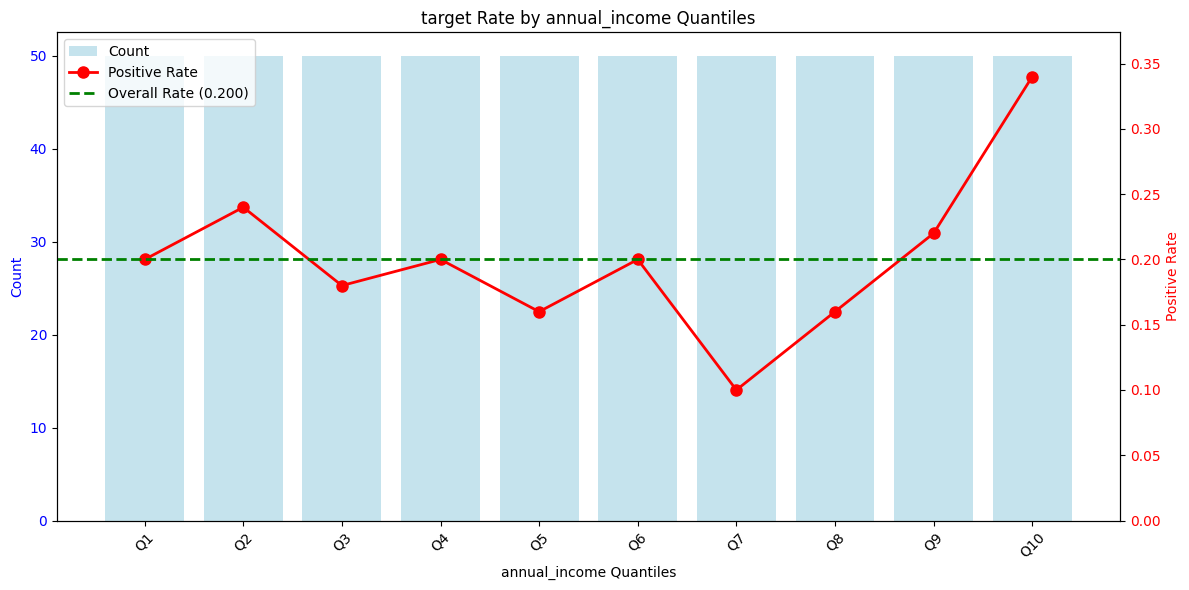

,count,positive_cases,positive_rate,min_value,max_value,mean_value,pct_of_total
annual_income_quantile,,,,,,,
Q1,50,10,0.20,4198.5340,1.341698e+04,10009.1375,10.0
Q2,50,12,0.24,13660.9647,2.067179e+04,17298.5176,10.0
Q3,50,9,0.18,20691.0984,2.514744e+04,23075.4196,10.0
Q4,50,10,0.20,25289.7624,3.152204e+04,28073.2144,10.0
Q5,50,8,0.16,31770.8835,3.931911e+04,35693.9424,10.0
Q6,50,10,0.20,39543.0085,4.760995e+04,43547.6168,10.0
Q7,50,5,0.10,47957.2546,6.052876e+04,54446.9063,10.0
Q8,50,8,0.16,60637.8333,8.290707e+04,69159.7142,10.0
Q9,50,11,0.22,83285.6842,1.303843e+05,102793.1629,10.0


In [18]:
# Analyze annual_income quantiles
income_analysis = tools.analyze_by_quantiles(df, 'annual_income', 'target', n_quantiles=10)
print("Income Quantile Analysis:")
print(income_analysis)

# Visualize the relationship
tools.plot_quantile_analysis(df, 'annual_income', 'target', n_quantiles=10)

# Find Signal Strength

In [19]:
# Find which features have the strongest signal
signal_strength = tools.find_signal_strength(df, 'target')
print("\nTop 10 Features by Signal Strength:")
print(signal_strength.head(10))

Error processing product_views: Bin labels must be one fewer than the number of bin edges

Top 10 Features by Signal Strength:
               column  correlation  max_lift      gini  missing_pct
1       annual_income     0.172173    0.7000 -0.368066         0.00
6           feature_b     0.025902    0.5000 -0.344861         0.00
0                 age     0.024133    0.5115 -0.341652         0.00
5           feature_a     0.017576    0.4000 -0.335060         0.00
2        credit_score     0.029291    0.3635 -0.334228         0.11
3  transaction_amount    -0.046985    0.4000 -0.304706         0.00
4            zip_code    -0.047066    0.5000 -0.285919         0.00


# Create Quantiles

In [21]:
# Create income deciles
df_with_deciles = tools.create_quantile_bins(df, 'annual_income', n_quantiles=10)

# Analyze by income deciles
tools.group_analyze(df_with_deciles, 'annual_income_quantile', 'target')

# Cross-tab income deciles with membership
tools.group_compare(df_with_deciles, 'annual_income_quantile', 'membership_level', 'target')


Analysis of target by annual_income_quantile
Overall target rate: 20.00%
+--------------------------+---------+-------------+--------+----------------+--------------------+--------+------------+
| annual_income_quantile   |   count |   positives | rate   | pct_of_total   | pct_of_positives   |   lift | lift_pct   |
+==========================+=========+=============+========+================+====================+========+============+
| Q1                       |      50 |          10 | 20.00% | 10.00%         | 10.00%             |  1.000 | +0.0%      |
+--------------------------+---------+-------------+--------+----------------+--------------------+--------+------------+
| Q2                       |      50 |          12 | 24.00% | 10.00%         | 12.00%             |  1.200 | +20.0%     |
+--------------------------+---------+-------------+--------+----------------+--------------------+--------+------------+
| Q3                       |      50 |           9 | 18.00% | 10.00%    

count                           mean            \
membership_level       Bronze Gold Platinum Silver    Bronze      Gold   
annual_income_quantile                                                   
Q1                         15   12        7     14  0.133333  0.166667   
Q2                         16   10        6     15  0.000000  0.500000   
Q3                         15    7        7     16  0.000000  0.142857   
Q4                         18    9        5     15  0.055556  0.333333   
Q5                         13    9        3     20  0.076923  0.333333   
Q6                         18   12        4     13  0.000000  0.416667   
Q7                         22   11        3     11  0.000000  0.181818   
Q8                         19    8        4     14  0.000000  0.500000   
Q9                         15    7        4     17  0.066667  0.428571   
Q10                        26    5        6      9  0.153846  0.600000   

                                            
membership_level        Platinum    Silver  
annual_income_quantile                      
Q1                      0.857143  0.000000  
Q2                      1.000000  0.066667  
Q3                      1.000000  0.062500  
Q4                      1.000000  0.066667  
Q5                      1.000000  0.050000  
Q6                      1.000000  0.076923  
Q7                      1.000000  0.000000  
Q8                      1.000000  0.000000  
Q9                      1.000000  0.176471  
Q10                     1.000000  0.444444

# Full EDA Pipeline

Starting Exploratory Data Analysis...

1. DATA DISCOVERY
DATASET OVERVIEW
Shape: 500 rows × 20 columns
Memory usage: 0.07 MB

Data Types:
object     8
float64    7
int64      3
bool       2
dtype: int64

Missing Values:
                  Missing Count  Percentage
empty_column                500       100.0
credit_score                 55        11.0
membership_level             40         8.0

First few rows:


,age,annual_income,credit_score,transaction_amount,product_views,gender,state,customer_id,membership_level,account_created,is_active,has_discount,customer_name,zip_code,product_type,feature_a,feature_b,target,empty_column,constant_column
0,28,83727.997743,49.444448,587.185346,0.00000,M,NY,CUST000383,NaN,2024-05-04,True,True,Charlie Brown,45814,Product@E,74.322722,62.352008,0,NaN,constant_value
1,37,22890.711694,41.253838,197.826427,0.00000,M,IL,CUST000039,Silver,2024-07-24,True,False,Alice Davis,34561,Product C,90.736181,68.525237,0,NaN,constant_value
2,45,37105.061624,41.113036,604.414719,0.00000,Other,NC,CUST000489,Gold,2022-09-05,True,False,Charlie Johnson,82980,Product/D,123.352362,117.991919,0,NaN,constant_value
3,33,55483.632278,46.269633,21.721193,41.48655,F,IL,CUST000042,Gold,2023-12-12,False,True,Diana Smith,65063,Product C,112.858167,95.357249,0,NaN,constant_value
4,57,27243.393419,48.753416,43.158406,0.00000,M,MI,CUST000387,Gold,2021-08-16,True,True,Jane Brown,42844,Product@E,96.576092,46.700752,0,NaN,constant_value



Random sample:


,age,annual_income,credit_score,transaction_amount,product_views,gender,state,customer_id,membership_level,account_created,is_active,has_discount,customer_name,zip_code,product_type,feature_a,feature_b,target,empty_column,constant_column
440,24,64136.440413,NaN,128.535575,0.000000,F,IL,CUST000188,Bronze,2024-07-06,True,False,Eve Miller,71807,Product/D,104.579523,81.765169,0,NaN,constant_value
453,18,9245.250932,97.896614,7.091477,129.587178,M,FL,CUST000221,Gold,2022-03-31,True,False,Eve Williams,51542,Product-B,88.859691,76.100287,0,NaN,constant_value
77,35,50342.362808,43.290172,99.492066,0.000000,M,PA,CUST000232,NaN,2024-08-11,True,False,Diana Brown,55213,Product/D,70.089275,65.747012,0,NaN,constant_value
439,45,35184.322432,NaN,26.084303,0.000000,M,TX,CUST000296,Silver,2021-03-23,True,False,John Davis,19066,Product@E,96.565994,102.538472,0,NaN,constant_value
333,49,109724.416075,54.787618,123.362703,0.000000,F,NY,CUST000394,NaN,2022-12-02,False,False,Jane Johnson,99572,Product C,97.099565,71.649792,0,NaN,constant_value



Descriptive statistics:


,age,annual_income,credit_score,transaction_amount,product_views,zip_code,feature_a,feature_b,target,empty_column
count,500.00000,5.000000e+02,445.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,0.0
mean,34.93400,6.651684e+04,51.389075,96.476220,19.425605,56822.332000,100.476001,80.196526,0.200000,NaN
std,11.11615,1.032130e+05,14.588875,93.649593,46.330500,26213.014729,20.795016,19.443569,0.400401,NaN
min,18.00000,4.198534e+03,6.179743,0.199412,0.000000,10036.000000,38.960565,8.151076,0.000000,NaN
25%,26.00000,2.327023e+04,41.567480,29.108790,0.000000,34100.500000,86.089079,67.219059,0.000000,NaN
50%,35.00000,3.943106e+04,51.004861,70.998435,0.000000,58482.500000,101.105816,81.243030,0.000000,NaN
75%,42.00000,6.686483e+04,61.400839,132.111399,0.000000,79481.250000,114.719828,92.901056,0.000000,NaN
max,80.00000,1.150653e+06,97.896614,680.575122,392.623771,99900.000000,156.906285,135.993277,1.000000,NaN



2. DATA CLEANING
Dropped 1 columns with >50.0% missing values
Cleaned data shape: (500, 19)

3. DATA EXPLORATION

Column Profiling:


,Column,Type,Non-Null Count,Null Count,Null %,Unique Values,Unique %,Mean,Std,Min,Max,Top Value,Top Value Freq
0,age,int64,500,0,0.0,49,9.8,34.934000,11.116150,18.000000,8.000000e+01,NaN,NaN
1,annual_income,float64,500,0,0.0,500,100.0,66516.836484,103213.009083,4198.533958,1.150653e+06,NaN,NaN
2,credit_score,float64,500,0,0.0,445,89.0,51.346812,13.761939,6.179743,9.789661e+01,NaN,NaN
3,transaction_amount,float64,500,0,0.0,500,100.0,96.476220,93.649593,0.199412,6.805751e+02,NaN,NaN
4,product_views,float64,500,0,0.0,123,24.6,19.425605,46.330500,0.000000,3.926238e+02,NaN,NaN
5,gender,object,500,0,0.0,3,0.6,NaN,NaN,NaN,NaN,M,231.0
6,state,object,500,0,0.0,10,2.0,NaN,NaN,NaN,NaN,MI,58.0
7,customer_id,object,500,0,0.0,500,100.0,NaN,NaN,NaN,NaN,CUST000383,1.0
8,membership_level,object,500,0,0.0,4,0.8,NaN,NaN,NaN,NaN,Bronze,217.0
9,account_created,object,500,0,0.0,437,87.4,NaN,NaN,NaN,NaN,2022-08-24,4.0



Exploring Relationships:


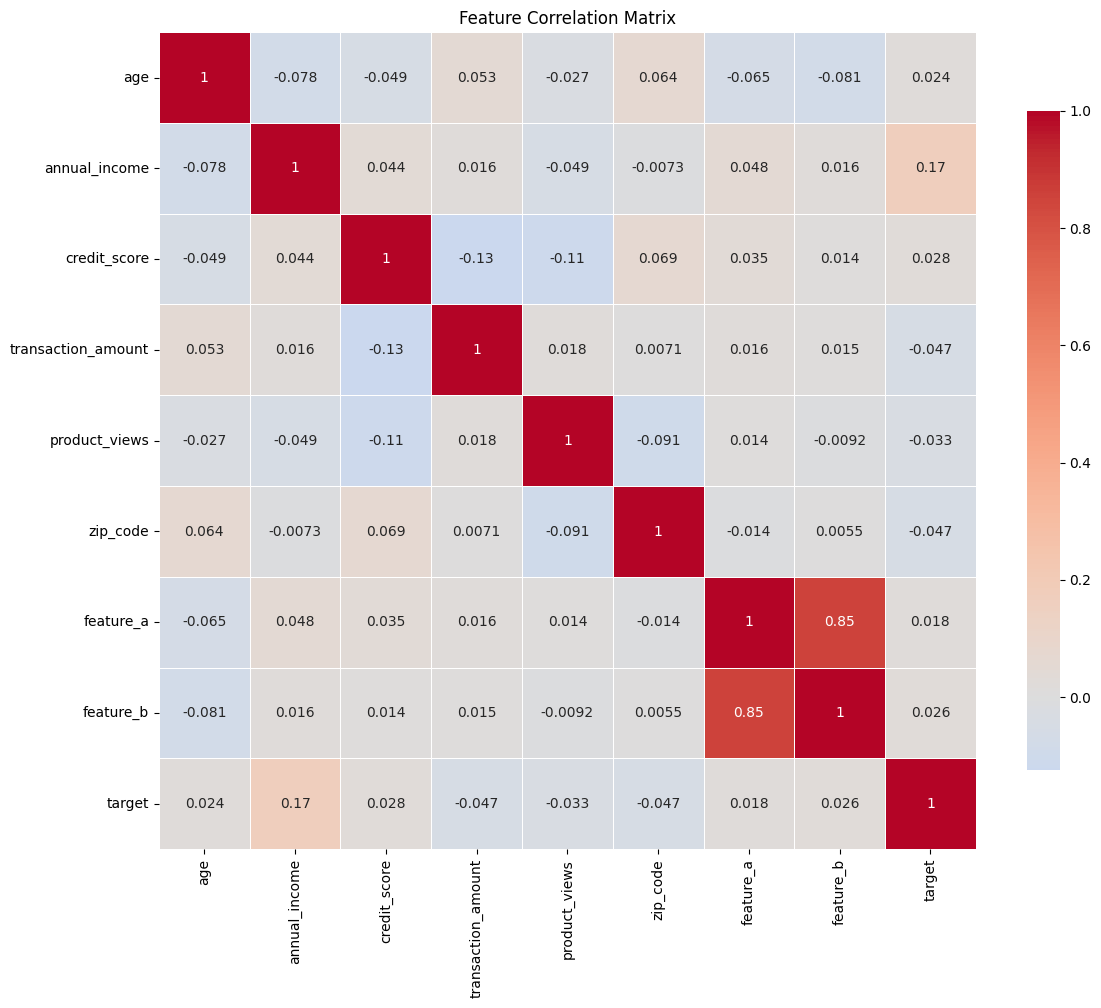


Correlations with target:
target                1.000000
annual_income         0.172173
credit_score          0.028142
feature_b             0.025902
age                   0.024133
feature_a             0.017576
product_views        -0.032775
transaction_amount   -0.046985
zip_code             -0.047066
Name: target, dtype: float64


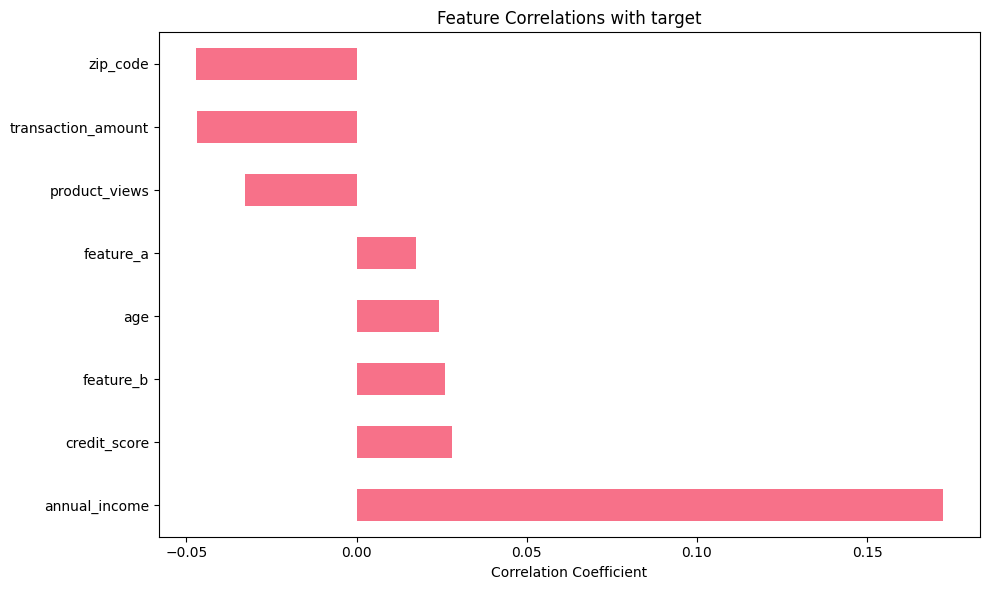


Categorical Analysis:

Analysis of gender
Unique values: 3

Top 10 values:
M        231
F        217
Other     52
Name: gender, dtype: int64


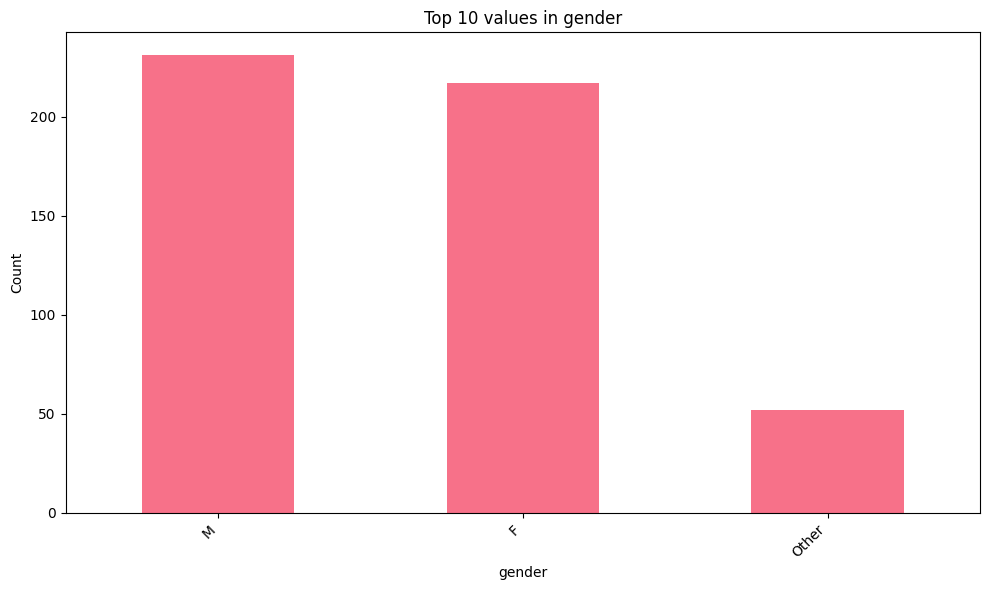


Analysis of state
Unique values: 10

Top 10 values:
MI    58
OH    58
IL    55
TX    54
FL    53
GA    48
PA    46
CA    45
NC    44
NY    39
Name: state, dtype: int64


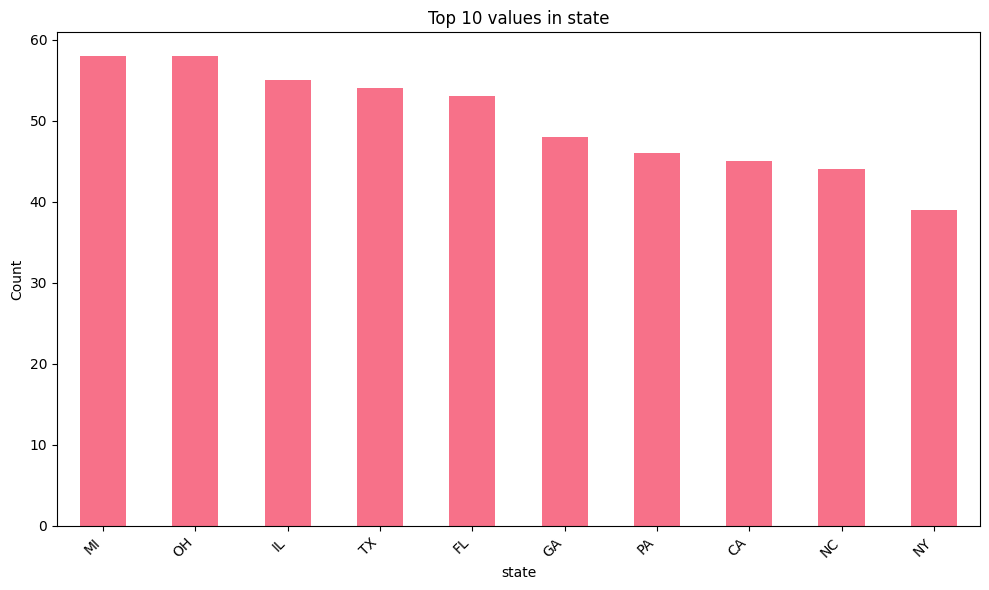


Analysis of customer_id
Unique values: 500

Top 10 values:
CUST000383    1
CUST000105    1
CUST000270    1
CUST000472    1
CUST000001    1
CUST000382    1
CUST000029    1
CUST000081    1
CUST000030    1
CUST000349    1
Name: customer_id, dtype: int64

Analysis of membership_level
Unique values: 4

Top 10 values:
Bronze      217
Silver      144
Gold         90
Platinum     49
Name: membership_level, dtype: int64


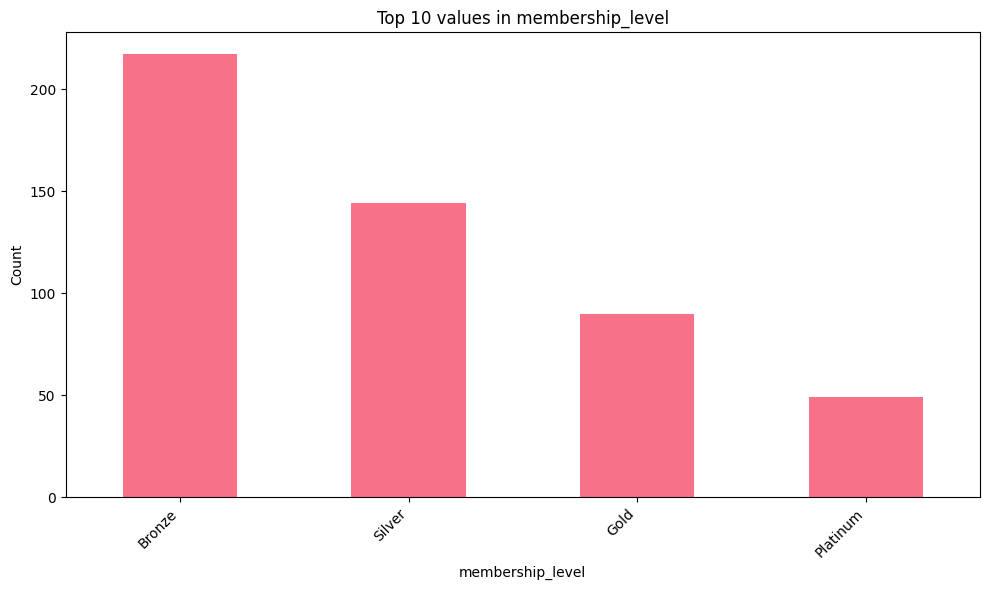


Analysis of account_created
Unique values: 437

Top 10 values:
2022-08-24    4
2024-12-20    3
2021-12-16    3
2023-03-07    3
2022-04-28    3
2020-05-28    2
2023-06-30    2
2022-03-15    2
2022-12-05    2
2023-12-10    2
Name: account_created, dtype: int64

Analysis of customer_name
Unique values: 64

Top 10 values:
John Brown         13
Charlie Johnson    13
Frank Miller       12
Bob Jones          12
John Miller        12
Alice Miller       12
John Johnson       11
Frank Brown        11
Alice Smith        11
Diana Johnson      11
Name: customer_name, dtype: int64

Analysis of product_type
Unique values: 5

Top 10 values:
Product/D    111
Product@E    105
Product-B     98
Product C     94
Product_A     92
Name: product_type, dtype: int64


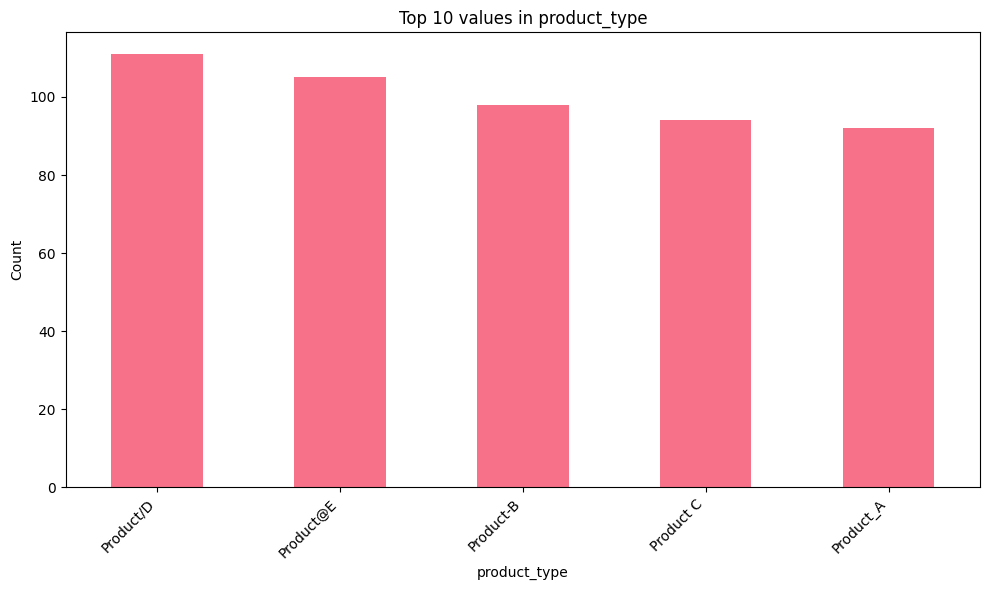


Analysis of constant_column
Unique values: 1

Top 10 values:
constant_value    500
Name: constant_column, dtype: int64


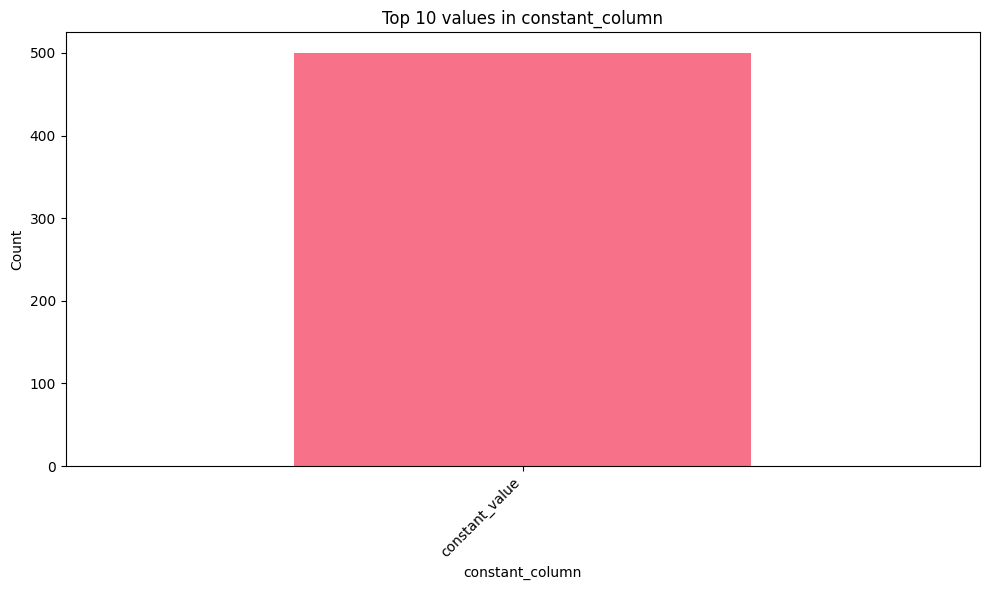


4. VISUALIZATIONS


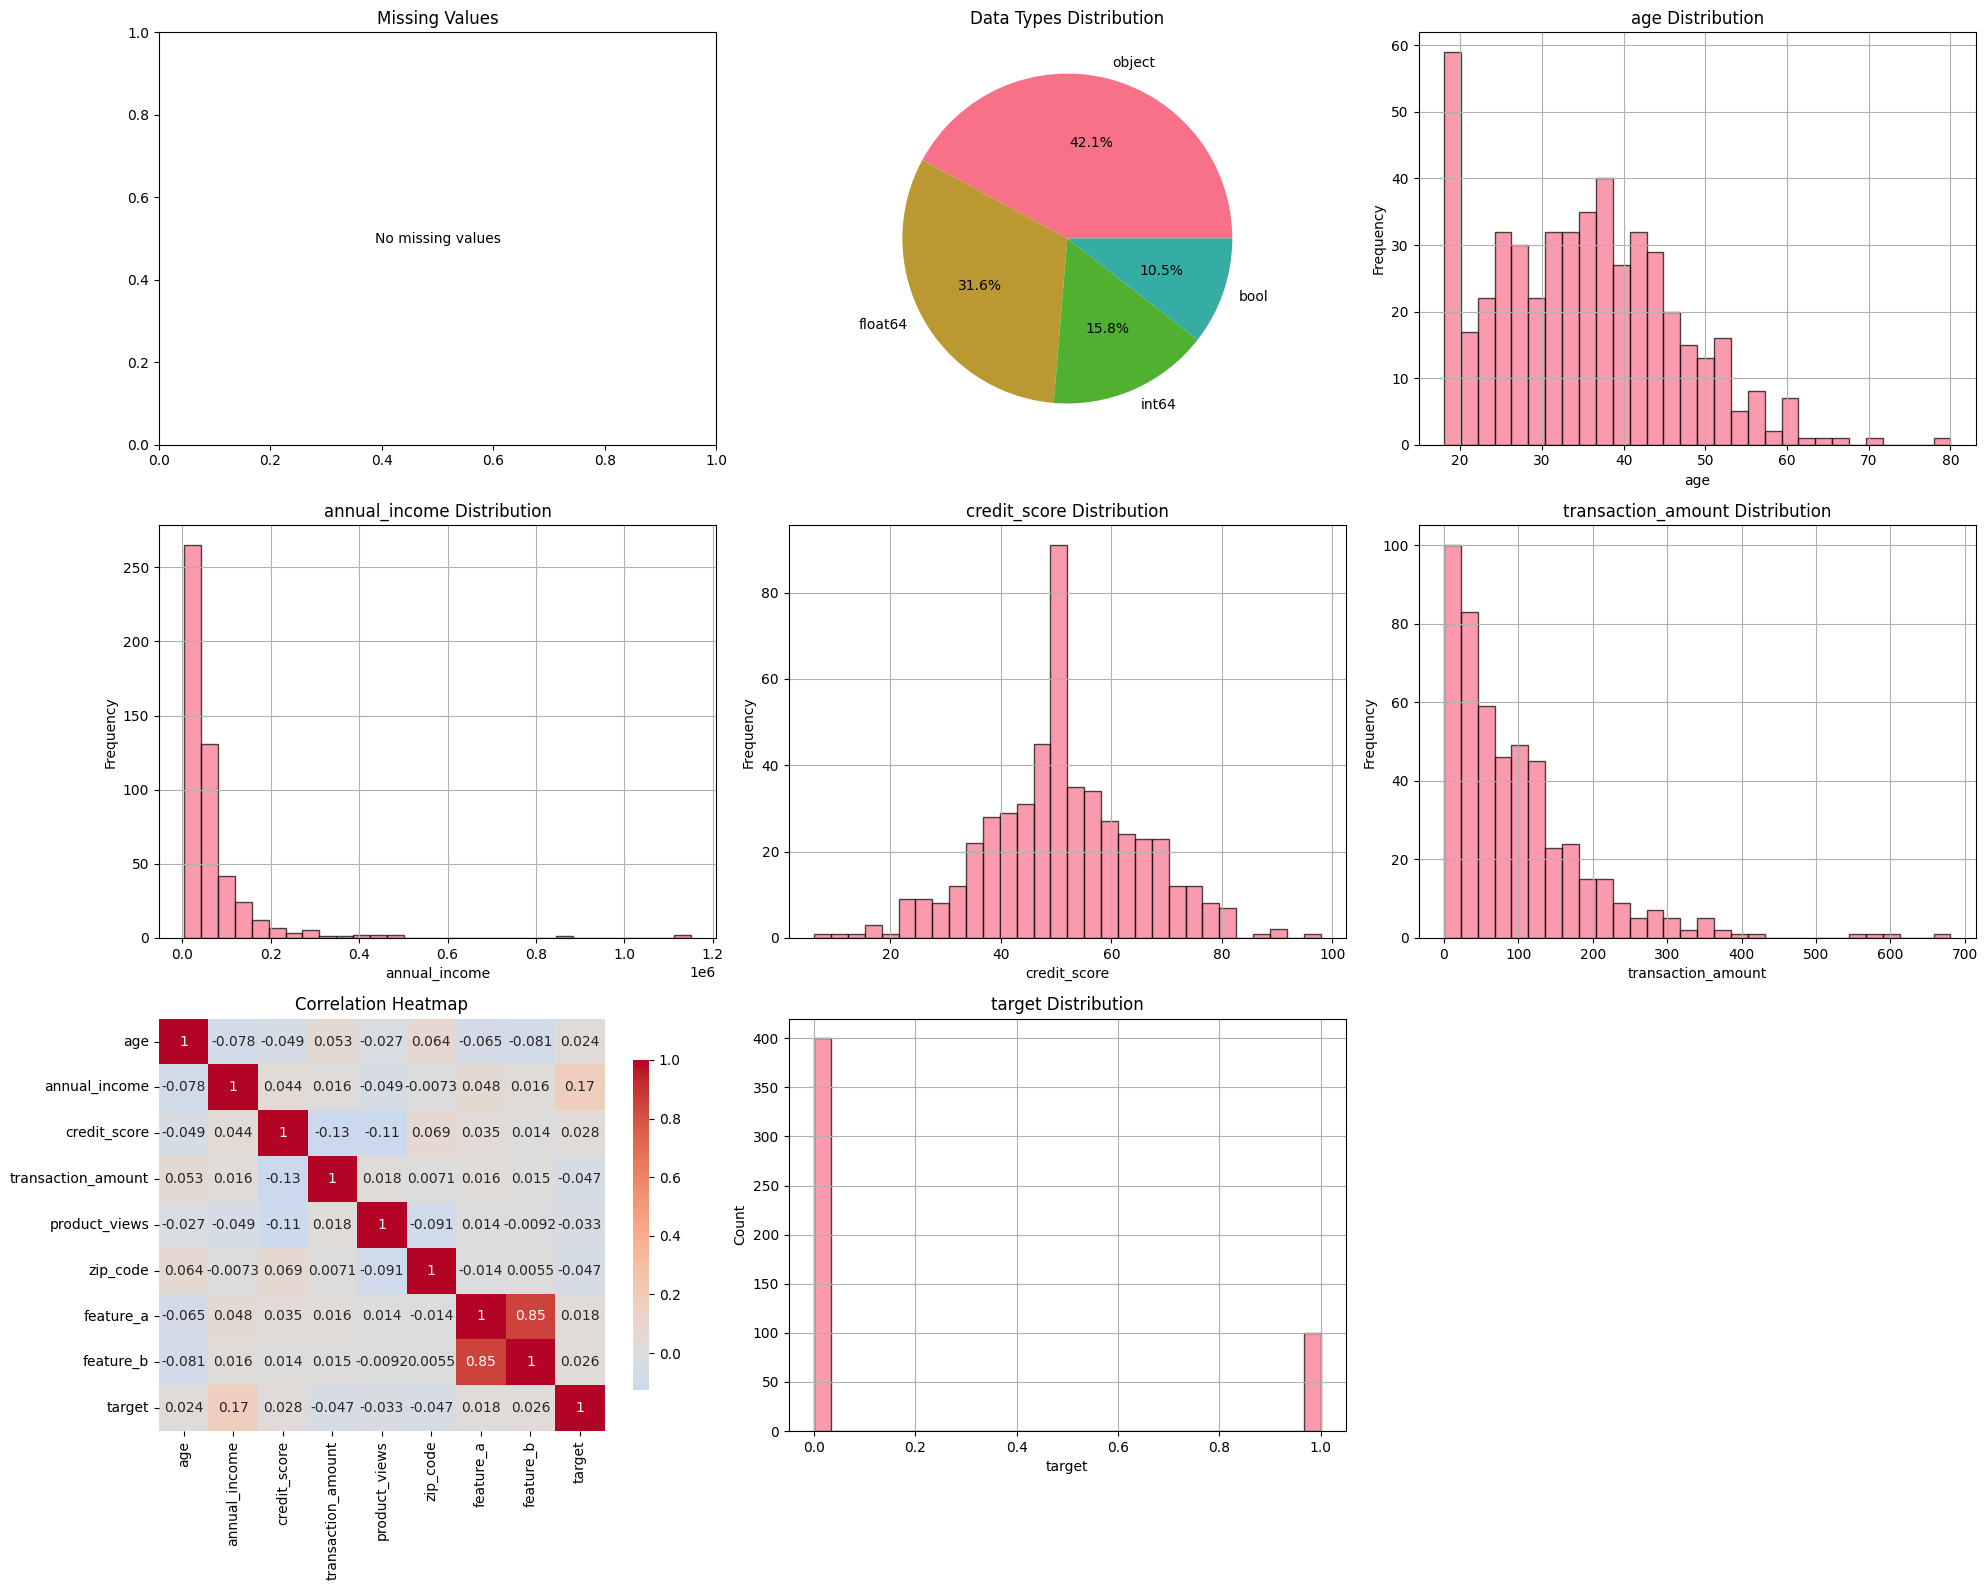

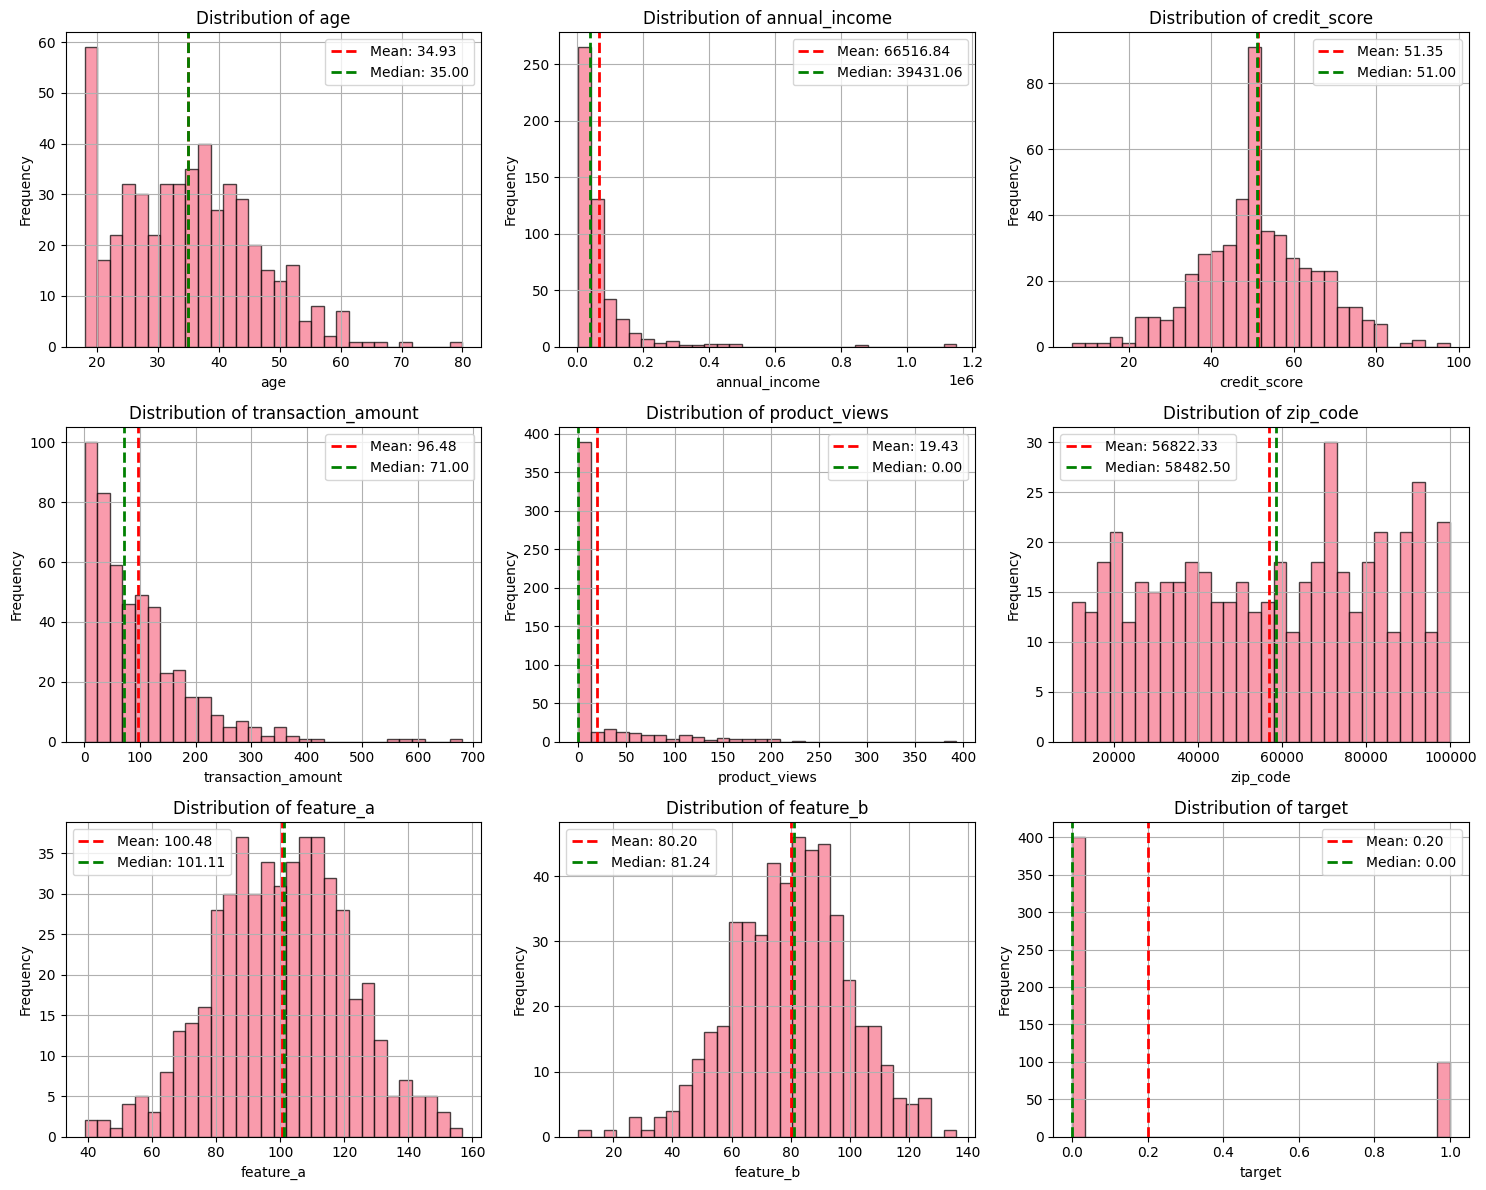

In [22]:
df_clean = tools.perform_eda(df, target_col='target', clean_data=True)